In [8]:
import os

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

import mnist

In [9]:
dataset_dir = "./mnist_data/MNIST/raw/"

train_features, train_labels = mnist.load_dataset(
    os.path.join(dataset_dir, "train-images-idx3-ubyte.gz"),
    os.path.join(dataset_dir, "train-labels-idx1-ubyte.gz"),
    total_images=60000,
    image_size=28,
)
train_features /= 255.0

test_features, test_labels = mnist.load_dataset(
    os.path.join(dataset_dir, "t10k-images-idx3-ubyte.gz"),
    os.path.join(dataset_dir, "t10k-labels-idx1-ubyte.gz"),
    total_images=10000,
    image_size=28,
)
test_features /= 255.0

print(train_features.shape, train_labels.shape)
print(test_features.shape, test_labels.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


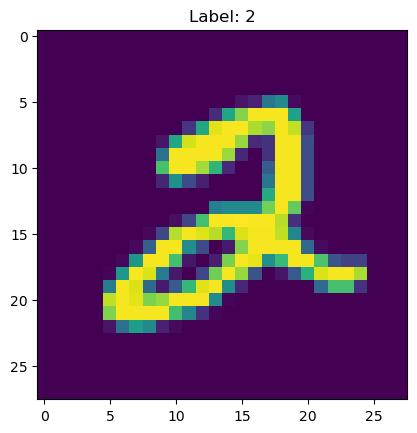

In [10]:
# plotting the image
idx = 5
image = train_features[idx]
plt.title(f"Label: {train_labels[idx]}")
plt.imshow(image)
plt.show()

In [ ]:
train_features = train_features.reshape(train_features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)

# Logistic Regression

## 1. What Problem is Logistic Regression Used to Solve?

Logistic regression is used to solve **classification problems**, where the goal is to predict discrete categories or labels rather than continuous values. While standard logistic regression is often used for **binary classification** (predicting one of two possible classes, like “spam” or “not spam”), the approach can also be extended to handle **multiclass classification** tasks. This extension is called **multinomial logistic regression** (or softmax regression). Multinomial logistic regression allows us to classify data into more than two categories, such as predicting types of animals, customer segments, or product categories.

## 2. What Assumption Does the Model Make?

Logistic regression assumes a **linear relationship** between the input features and the **log-odds** (logarithm of the odds) of the class probabilities. This assumption implies that a linear combination of the input features can adequately separate the classes. For binary logistic regression, this means the log-odds of the probability of one class versus the other is linearly related to the features.

In multinomial logistic regression, we extend this assumption by creating separate linear functions for each class. For $K$ classes, we have $K$ sets of weights and intercepts, each modeling the log-odds of one class relative to a baseline class. This results in $K - 1$ decision boundaries in the feature space, each approximated as a linear function, dividing the space into regions corresponding to each class.

## 3. What is the Model?

Logistic regression uses a **logistic function** (sigmoid) to transform the linear combination of input features into a probability between 0 and 1. The model for binary logistic regression is:

$$
P(y=1|X) = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

where $z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$, and $\sigma(z)$ is the sigmoid function. Here, $P(y=1|X)$ represents the probability that the input $X$ belongs to the positive class.

For **multinomial logistic regression**, we generalize this with the **softmax function**. Given $K$ possible classes, the model computes the probability for each class $j$ as:

$$
P(y=j|X) = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}
$$

where $z_j = \beta_{j0} + \beta_{j1} x_1 + \beta_{j2} x_2 + ... + \beta_{jn} x_n$ is the linear score for class $j$. The softmax function ensures that the probabilities for all classes sum to 1, making it suitable for multiclass classification. The class with the highest probability is typically chosen as the predicted class.

## 4. How is the Model Trained?

Logistic regression is trained by **maximizing the likelihood** of the observed class labels, a process known as **maximum likelihood estimation (MLE)**. In binary logistic regression, this involves minimizing a **log loss** (or binary cross-entropy) function:

$$
\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

where $\hat{y}_i$ is the predicted probability for the positive class for each data point $i$, and $y_i$ is the actual label.

For **multinomial logistic regression**, the model optimizes a **multiclass log loss** (or cross-entropy) function:

$$
\text{Multiclass Log Loss} = -\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^K y_{ij} \log(P(y=j|X_i))
$$

where $y_{ij}$ is a binary indicator (1 if sample $i$ belongs to class $j$, 0 otherwise), and $P(y=j|X_i)$ is the predicted probability for class $j$.

Training both binary and multinomial logistic regression models involves adjusting the weights $\beta$ to minimize the log loss. Optimization techniques like **gradient descent** or **stochastic gradient descent** are often used to efficiently update the weights during training. This iterative process continues until the model reaches a set of weights that minimize the loss, resulting in a model that can make accurate classifications on unseen data.

In [ ]:
model = LogisticRegression()
model.fit(train_features, train_labels)

train_accuracy = model.score(train_features, train_labels)
test_accuracy = model.score(test_features, test_labels)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.9346166666666667
Test accuracy: 0.9256


/Users/ericduong/miniforge3/envs/torch/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
